In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


c:\Users\Mariel Guamuche\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
path = kagglehub.dataset_download("marusagar/bank-transaction-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mariel Guamuche\.cache\kagglehub\datasets\marusagar\bank-transaction-fraud-detection\versions\1


In [4]:
# Find the CSV file in the dataset directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
dataset_file = os.path.join(path, csv_files[0])

# Load the dataset into a DataFrame
data = pd.read_csv(dataset_file)
data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


## Transformation

In [5]:
print(data.columns)
print(data.shape)
print(data.info())
print(data.select_dtypes(exclude=np.number).columns)
print(data.describe(include='all'))

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')
(200000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   

### Standarize strings

In [6]:
number_cols = data.select_dtypes(include=[np.number]).columns
string_cols = data.select_dtypes(exclude=[np.number]).columns
for col in string_cols:
    data[col] = data[col].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

### Handle dates

In [7]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], errors='coerce')
data['Transaction_Time'] = pd.to_datetime(data['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.time
data['Transaction_Datetime'] = pd.to_datetime(data['Transaction_Date'].astype(str) + ' ' + data['Transaction_Time'].astype(str), errors='coerce')

C:\Users\Mariel Guamuche\AppData\Local\Temp\ipykernel_6368\2324014094.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], errors='coerce')


### Handle Nulls

In [8]:
data.isna().sum()


Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
Transaction_Datetime       0
dtype: int64

Aquí se haría un procedimiento para manejar nulos, en este caso no aplica pero igual

In [9]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['object', 'category']:
            mode = data[col].mode()[0]
            data[col].fillna(mode, inplace=True)
        elif np.issubdtype(data[col].dtype, np.number):
            median = data[col].median()
            data[col].fillna(median, inplace=True)
        elif 'datetime' in str(data[col].dtype):
            data[col].fillna(method='ffill', inplace=True)

### Encoding

In [10]:
string_cols

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Currency', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [11]:
le = LabelEncoder()
data['Gender_Encoding'] = data['Gender'].map({'male': 1, 'female': 0}).fillna(-1)
data['Bank_Branch_Encoding'] = le.fit_transform(data['Bank_Branch'])


In [12]:
data[number_cols].head()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
0,60,32415.45,74557.27,0
1,51,43622.60,74622.66,0
2,20,63062.56,66817.99,0
3,57,14000.72,58177.08,0
4,43,18335.16,16108.56,0


In [13]:
data[string_cols].head()

,Customer_ID,Customer_Name,Gender,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Merchant_ID,Transaction_Type,Merchant_Category,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,osha tella,male,kerala,thiruvananthapuram,thiruvananthapuram branch,savings,4fa3208f-9e23-42dc-b330-844829d0c12c,2025-01-23,16:04:07,214e03c5-5c34-40d1-a66c-f440aa2bbd02,transfer,restaurant,voice assistant,"thiruvananthapuram, kerala",pos,inr,+9198579xxxxxx,bitcoin transaction,oshaxxxxx@xxxxx.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,hredhaan khosla,female,maharashtra,nashik,nashik branch,business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,2025-01-11,17:14:53,f9e3f11f-28d3-4199-b0ca-f225a155ede6,bill payment,restaurant,pos mobile device,"nashik, maharashtra",desktop,inr,+9191074xxxxxx,grocery delivery,hredhaanxxxx@xxxxxx.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,ekani nazareth,male,bihar,bhagalpur,bhagalpur branch,savings,e41c55f9-c016-4ff3-872b-cae72467c75c,2025-01-25,03:09:52,97977d83-5486-4510-af1c-8dada3e1cfa0,bill payment,groceries,atm,"bhagalpur, bihar",desktop,inr,+9197745xxxxxx,mutual fund investment,ekanixxx@xxxxxx.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,yamini ramachandran,female,tamil nadu,chennai,chennai branch,business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,2025-01-19,12:27:02,f45cd6b3-5092-44d0-8afb-490894605184,debit,entertainment,pos mobile app,"chennai, tamil nadu",mobile,inr,+9195889xxxxxx,food delivery,yaminixxxxx@xxxxxxx.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,kritika rege,female,punjab,amritsar,amritsar branch,savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,2025-01-30,18:30:46,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,transfer,entertainment,virtual card,"amritsar, punjab",mobile,inr,+9195316xxxxxx,debt repayment,kritikaxxxx@xxxxxx.com


### Drop unnecessary features

In [14]:
data.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email', 'Transaction_Datetime', 'Gender_Encoding',
       'Bank_Branch_Encoding'],
      dtype='object')

In [15]:
data.drop(columns=[
    'Customer_ID', 'Customer_Name', 'City', 'Bank_Branch', "Customer_Email", "Transaction_ID", "Merchant_ID", 
    "Customer_Contact", "Transaction_Currency", "Device_Type", "Transaction_Location", "Transaction_Description"
    ], inplace=True)

### Feature Engineering

In [16]:
# Crear nuevas features
data['Transaction_Hour'] = data['Transaction_Time'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)
data['Is_Night'] = data['Transaction_Hour'].apply(lambda x: 1 if x >= 22 or x < 6 else 0)
data['Transaction_Weekday'] = data['Transaction_Date'].dt.day
data['Transaction_Weekend'] = data['Transaction_Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
data.drop(columns="Transaction_Weekday", inplace=True)
data['Transaction_Amount_to_Balance'] = data['Transaction_Amount'] / (data['Account_Balance'])
# Normalizar
scaler = MinMaxScaler()
data["Transaction_Amount_Scaler"] = scaler.fit_transform(data[["Transaction_Amount"]])

In [17]:
data.columns

Index(['Gender', 'Age', 'State', 'Account_Type', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Is_Fraud', 'Transaction_Datetime', 'Gender_Encoding',
       'Bank_Branch_Encoding', 'Transaction_Hour', 'Is_Night',
       'Transaction_Weekend', 'Transaction_Amount_to_Balance',
       'Transaction_Amount_Scaler'],
      dtype='object')

In [18]:
data['Transaction_Day'] = data['Transaction_Date'].dt.day
data['Transaction_Month'] = data['Transaction_Date'].dt.month
data['Transaction_Year'] = data['Transaction_Date'].dt.year

data.drop(columns=['Transaction_Date', 'Transaction_Time'], inplace=True)

In [19]:
data.columns

Index(['Gender', 'Age', 'State', 'Account_Type', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Is_Fraud', 'Transaction_Datetime',
       'Gender_Encoding', 'Bank_Branch_Encoding', 'Transaction_Hour',
       'Is_Night', 'Transaction_Weekend', 'Transaction_Amount_to_Balance',
       'Transaction_Amount_Scaler', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year'],
      dtype='object')

In [20]:
string_cols = data.select_dtypes(include=['object']).columns
string_cols

Index(['Gender', 'State', 'Account_Type', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device'],
      dtype='object')

In [21]:
string_cols = ['State', 'Account_Type', 'Transaction_Type','Merchant_Category', 'Transaction_Device']

In [22]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()
# Encoding de strings
for col in string_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
data[string_cols].head()

,State,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device
0,15,2,3,5,17
1,18,0,0,5,10
2,4,2,0,3,0
3,28,0,2,2,9
4,25,2,3,2,16


In [23]:
data.drop(columns=['Gender'], inplace=True)

Feature Selection

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = data.drop(columns=['Is_Fraud','Transaction_Datetime'])
y = data['Is_Fraud']

In [25]:
print("Shape X Dataframe: ", X.shape)
print("Columnas X Dataframe: ", X.columns)
print("-"*50)
print("Shape y Dataframe: ", y.shape)

Shape X Dataframe:  (200000, 18)
Columnas X Dataframe:  Index(['Age', 'State', 'Account_Type', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Gender_Encoding', 'Bank_Branch_Encoding',
       'Transaction_Hour', 'Is_Night', 'Transaction_Weekend',
       'Transaction_Amount_to_Balance', 'Transaction_Amount_Scaler',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')
--------------------------------------------------
Shape y Dataframe:  (200000,)


In [26]:
# entrenar el modelo
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [27]:
# Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

<Figure size 1200x800 with 0 Axes>

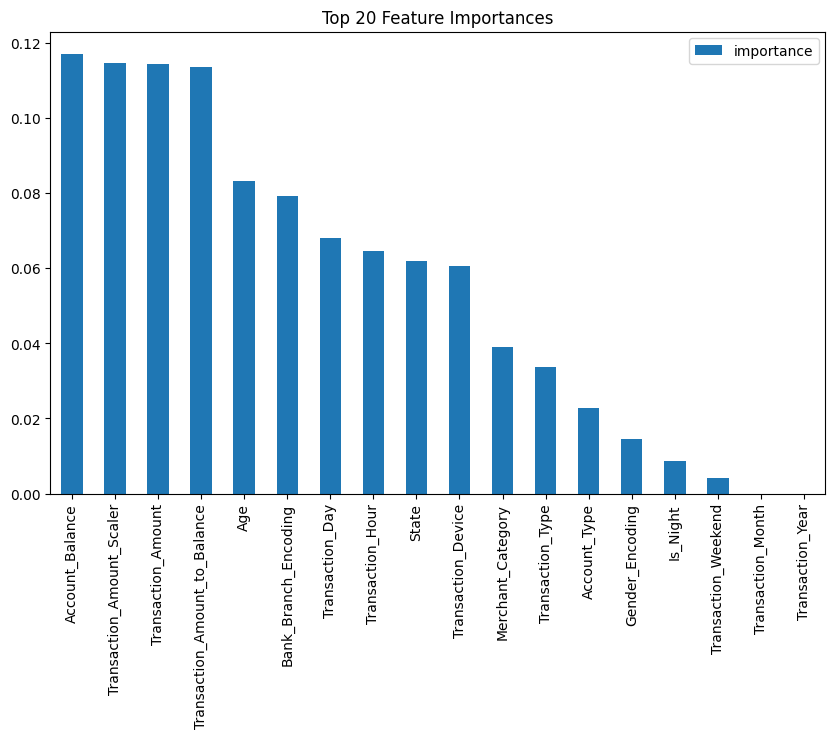

In [28]:
plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()

In [29]:
important_features = feature_importances[feature_importances['importance'] > 0.01].index
X = data[important_features]
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)

Shape for X Dataframe:  (200000, 14)
Columns for X Dataframe:  Index(['Account_Balance', 'Transaction_Amount_Scaler', 'Transaction_Amount',
       'Transaction_Amount_to_Balance', 'Age', 'Bank_Branch_Encoding',
       'Transaction_Day', 'Transaction_Hour', 'State', 'Transaction_Device',
       'Merchant_Category', 'Transaction_Type', 'Account_Type',
       'Gender_Encoding'],
      dtype='object')


### Train-test split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Definir los modelos y sus hiperparámetros
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }
}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Guardar resultados de los modelos
model_results = {}

# aplicar pesos para manejar el desbalance de clases 
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("class_weight_dict: ", class_weight_dict)

# SMOTE para manejar el desbalance de clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Evaluacion de modelos con GridSearchCV
for model_name, model in models.items():
    print(f"Training model with GridSearchCV: {model_name}")
    
    # Tener en cuenta el grid de parametros para cada modelo
    param_grid = param_grids[model_name]
    
    # Modificar modelo para incluir pesos de clase donde sea aplicable
    if model_name == 'Logistic Regression':
            model = LogisticRegression(class_weight='balanced')
    if model_name == 'Random Forest':
        model = RandomForestClassifier(class_weight='balanced')

    # GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Fit del modelo con los mejores parámetros usando los datos re-muestreados
    grid_search.fit(X_train_smote, y_train_smote)
    
    # los mejores hiperparámetros
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # predicciones 
    y_train_pred = best_model.predict(X_train_smote)
    y_test_pred = best_model.predict(X_test_scaled)
    
    # almacenar resultados del modelo
    model_results[model_name] = {
        'train_accuracy': best_model.score(X_train_smote, y_train_smote),
        'test_accuracy': best_model.score(X_test_scaled, y_test),
        'y_test': y_test,
        'y_test_pred': y_test_pred,
        'classification_report': classification_report(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
    }


class_weight_dict:  {0: 0.5264647235731161, 1: 9.946537361680965}
Training model with GridSearchCV: Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Training model with GridSearchCV: Decision Tree
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training model with GridSearchCV: Random Forest
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


----------------------------------------
Model: Logistic Regression
----------------------------------------
Train Accuracy: 0.5105
Test Accuracy: 0.4990
ROC AUC: 0.4976
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.50      0.65     37955
           1       0.05      0.50      0.09      2045

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.37     40000
weighted avg       0.90      0.50      0.63     40000

--------------------------------------------------------------------------------


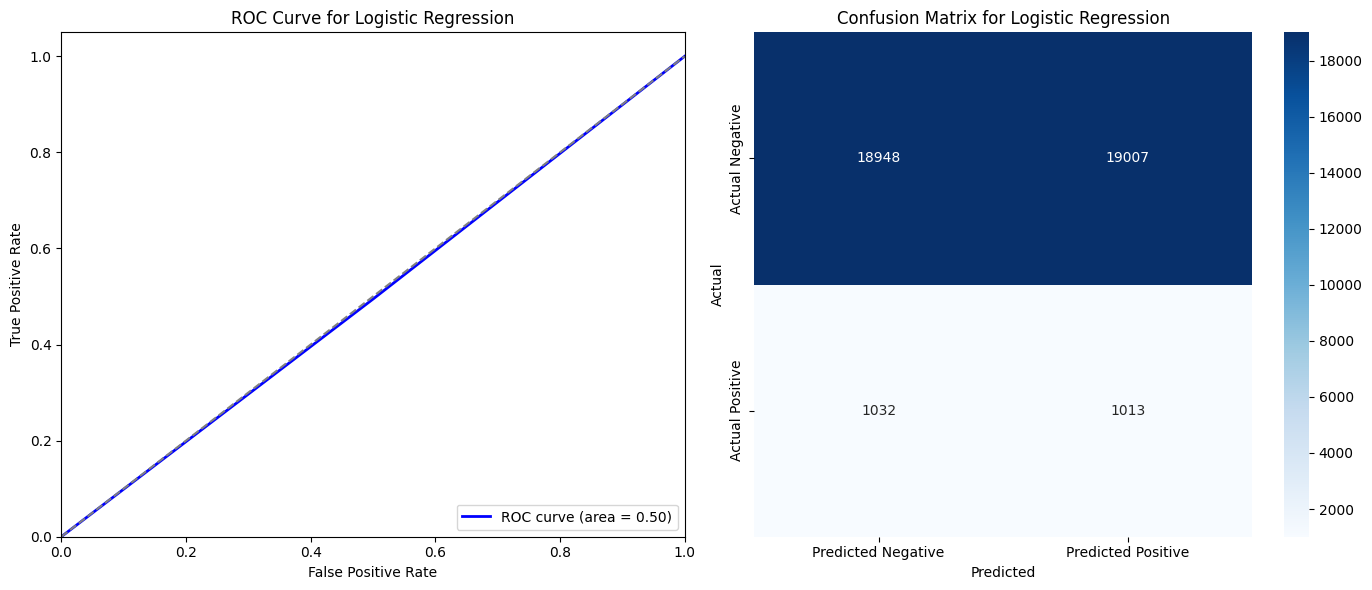

----------------------------------------
Model: Decision Tree
----------------------------------------
Train Accuracy: 0.8331
Test Accuracy: 0.9475
ROC AUC: 0.4969
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.09      0.00      0.01      2045

    accuracy                           0.95     40000
   macro avg       0.52      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


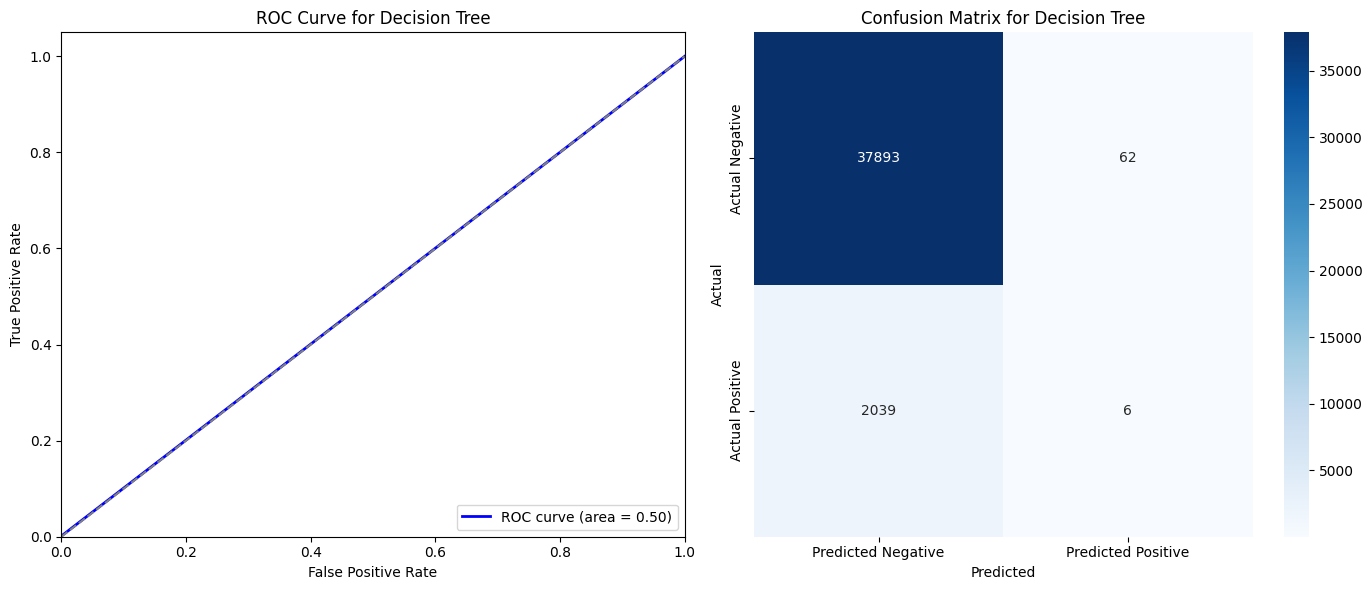

----------------------------------------
Model: Random Forest
----------------------------------------
Train Accuracy: 0.7897
Test Accuracy: 0.7824
ROC AUC: 0.5048
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     37955
           1       0.05      0.19      0.08      2045

    accuracy                           0.78     40000
   macro avg       0.50      0.50      0.48     40000
weighted avg       0.90      0.78      0.84     40000

--------------------------------------------------------------------------------


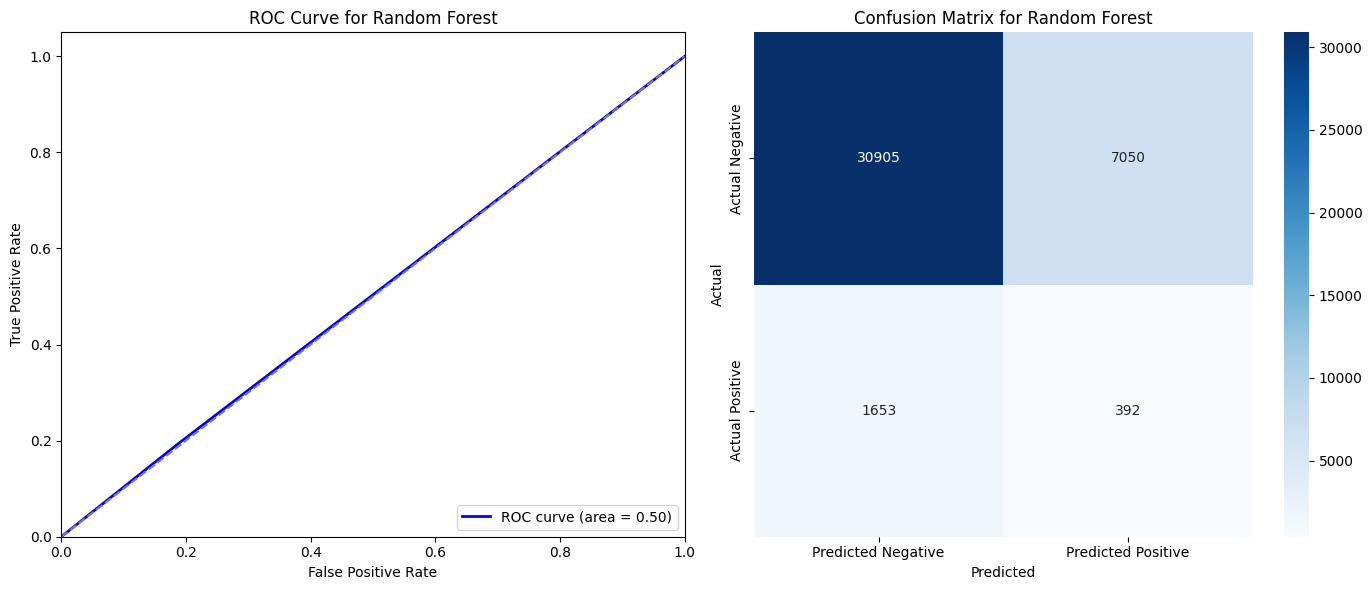

--------------------------------------------------------------------------------


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# lista para almacenar resultados de todos los modelos
results_list = []

# Iterar por los resultados de los modelos
for model_name, model in model_results.items():
    # Extract the predicted values and actual values
    y_test_pred = model['y_test_pred']  # Use the predicted labels
    y_test = model['y_test']  # Actual true labels
    
    # Metricas 
    train_accuracy = model['train_accuracy']
    test_accuracy = model['test_accuracy']
    roc_auc = model['roc_auc']
    
    # Reporte de clasificación
    clf_report = classification_report(y_test, y_test_pred)

    # metricas de evaluación
    print("-" * 40)
    print(f"Model: {model_name}")
    print("-" * 40)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(clf_report)
    print("-" * 80)  # Separator line for clarity
    
    # matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    roc_auc_value = auc(fpr, tpr)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  

    # La curva ROC
    ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'ROC Curve for {model_name}')
    ax1.legend(loc='lower right')

    # Matriz de confusión en el segundo subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax2)
    ax2.set_title(f'Confusion Matrix for {model_name}')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    # Presentar los dos gráficos
    plt.tight_layout()
    plt.show()

    # Resultados para cada modelo 
    results_list.append({
        'Model': model_name,
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'ROC AUC': f"{roc_auc:.4f}",
        'Classification Report': clf_report
    })

# Cambio de resultados a DataFrame
results_df = pd.DataFrame(results_list)

print("-" * 80)